In [1]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
# values and attributes should be list
def plotBarRepresentation(fig_size, values, attributes, namePlot, legendName, attributes_with_performance):

    # Figure Size
    fig, ax = plt.subplots(figsize = fig_size)
    
    # Horizontal Bar Plot
    ax.barh(attributes, values)
    
    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
    
    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    
    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)
    
    # Show top values 
    ax.invert_yaxis()
    
    # Add annotation to bars
    for i, attribute in zip(ax.patches, attributes):
        plt.text(i.get_width()+0.2, i.get_y()+0.5, 
                str(round((i.get_width()), 2)),
                fontsize = 10, fontweight ='bold',
                color ='grey')
        print(attribute)
        #print(attributes_with_performance['ma'][attribute])
        plt.text(i.get_width()+300, i.get_y()+0.5, 
                ("ma: %.3f" % attributes_with_performance['ma'][attribute]),
                fontsize = 10, fontweight ='bold',
                color ='black')
        plt.text(i.get_width()+600, i.get_y()+0.5, 
                ("acc: %.3f" % attributes_with_performance['acc'][attribute]),
                fontsize = 10, fontweight ='bold',
                color ='red')
        plt.text(i.get_width()+900, i.get_y()+0.5, 
                ("f1: %.3f" % attributes_with_performance['f1'][attribute]),
                fontsize = 10, fontweight ='bold',
                color ='green')
        plt.text(i.get_width()+1200, i.get_y()+0.5, 
                ("prec: %.3f" % attributes_with_performance['prec'][attribute]),
                fontsize = 10, fontweight ='bold',
                color ='orange')
    
    # Add Plot Title
    ax.set_title(legendName,
                loc ='left', )
    

    plt.savefig(namePlot) 

In [3]:
pathToAppearsTest = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/PETA/PETA_test0.csv'
pathToAppearsVal = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/PETA/PETA_val0.csv'
pathToAppearsTrain = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/PETA/PETA_train0.csv'

pathToMaTest = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/PETA/testing_ma.csv'
pathToF1Test = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/PETA/testing_f1.csv'
pathToAccTest = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/PETA/testing_acc.csv'
pathToPrecTest = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/PETA/testing_prec.csv'

In [4]:
test_dt = pd.read_csv(pathToAppearsTest, sep='\t', index_col=False)

test_dt_ma = pd.read_csv(pathToMaTest, sep=',', index_col=False)
test_dt_f1 = pd.read_csv(pathToF1Test, sep=';', index_col=False)
test_dt_acc = pd.read_csv(pathToAccTest, sep=';', index_col=False)
test_dt_prec = pd.read_csv(pathToPrecTest, sep=';', index_col=False)

In [5]:
test_dt_f1.columns

Index(['run_id', 'key', 'value', 'step', 'timestamp', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

In [6]:
strMa = 'testing_*_ma_*'
strNotMa = 'testing_ma_605'
notColumn = 'Unnamed: 0'
#attributes = list(test_dt.columns)
listAttributesPETA = ['accessoryHat','accessoryMuffler','accessoryNothing','accessorySunglasses','hairLong', 'upperBodyCasual', 'upperBodyFormal', 'upperBodyJacket', 'upperBodyLogo', 'upperBodyPlaid', 'upperBodyShortSleeve', 'upperBodyThinStripes', 'upperBodyTshirt','upperBodyOther','upperBodyVNeck','lowerBodyCasual', 'lowerBodyFormal', 'lowerBodyJeans', 'lowerBodyShorts', 'lowerBodyShortSkirt','lowerBodyTrousers','footwearLeatherShoes', 'footwearSandals', 'footwearShoes', 'footwearSneaker','carryingBackpack', 'carryingOther', 'carryingMessengerBag', 'carryingNothing', 'carryingPlasticBags','personalLess30','personalLess45','personalLess60','personalLarger60','personalMale']

attributes=listAttributesPETA

#attributes.remove(notColumn)

# fix this
#attributes.remove('HoldObjectsInFront')
#attributes.remove('UpperSplice')

bestStep = 8

attributes_with_performance = {}
attributes_with_performance['ma'] = {}
attributes_with_performance['f1'] = {}
attributes_with_performance['acc'] = {}
attributes_with_performance['prec'] = {}
for attribute in attributes:
    for typeKey in test_dt_ma['key'].unique():
        if attribute in typeKey:
            value = test_dt_ma[(test_dt_ma['key'] == typeKey) & (test_dt_ma['step'] == bestStep)]['value']
            attributes_with_performance['ma'][attribute] = float(value)
        # this elif is because the mlflow metric does not accept & and the original attribute is skirt&dress
        elif ('Skirt' in attribute and 'Dress' in attribute) and ('Skirt' in typeKey and 'Dress' in typeKey):
            value = test_dt_ma[(test_dt_ma['key'] == typeKey) & (test_dt_ma['step'] == bestStep)]['value']
            attributes_with_performance['ma'][attribute] = float(value)

    for typeKey in test_dt_f1['key'].unique():
        if attribute in typeKey:
            value = test_dt_f1[(test_dt_f1['key'] == typeKey) & (test_dt_f1['step'] == bestStep)]['value']
            attributes_with_performance['f1'][attribute] = float(value)
        elif ('Skirt' in attribute and 'Dress' in attribute) and ('Skirt' in typeKey and 'Dress' in typeKey):
            value = test_dt_f1[(test_dt_f1['key'] == typeKey) & (test_dt_f1['step'] == bestStep)]['value']
            attributes_with_performance['f1'][attribute] = float(value)

    for typeKey in test_dt_acc['key'].unique():
        if attribute in typeKey:
            value = test_dt_acc[(test_dt_acc['key'] == typeKey) & (test_dt_acc['step'] == bestStep)]['value']
            attributes_with_performance['acc'][attribute] = float(value)
        elif ('Skirt' in attribute and 'Dress' in attribute) and ('Skirt' in typeKey and 'Dress' in typeKey):
            value = test_dt_acc[(test_dt_acc['key'] == typeKey) & (test_dt_acc['step'] == bestStep)]['value']
            attributes_with_performance['acc'][attribute] = float(value)

    for typeKey in test_dt_prec['key'].unique():
        if attribute in typeKey:
            value = test_dt_prec[(test_dt_prec['key'] == typeKey) & (test_dt_prec['step'] == bestStep)]['value']
            attributes_with_performance['prec'][attribute] = float(value)
        elif ('Skirt' in attribute and 'Dress' in attribute) and ('Skirt' in typeKey and 'Dress' in typeKey):
            value = test_dt_prec[(test_dt_prec['key'] == typeKey) & (test_dt_prec['step'] == bestStep)]['value']
            attributes_with_performance['prec'][attribute] = float(value)

In [7]:
test_dt_ma['key'].unique()

array(['learning_rate', 'testing_accessoryHat_ma',
       'testing_accessoryMuffler_ma', 'testing_accessoryNothing_ma',
       'testing_accessorySunglasses_ma', 'testing_carryingBackpack_ma',
       'testing_carryingMessengerBag_ma', 'testing_carryingNothing_ma',
       'testing_carryingOther_ma', 'testing_carryingPlasticBags_ma',
       'testing_footwearLeatherShoes_ma', 'testing_footwearSandals_ma',
       'testing_footwearShoes_ma', 'testing_footwearSneaker_ma',
       'testing_hairLong_ma', 'testing_lowerBodyCasual_ma',
       'testing_lowerBodyFormal_ma', 'testing_lowerBodyJeans_ma',
       'testing_lowerBodyShortSkirt_ma', 'testing_lowerBodyShorts_ma',
       'testing_lowerBodyTrousers_ma', 'testing_personalLarger60_ma',
       'testing_personalLess30_ma', 'testing_personalLess45_ma',
       'testing_personalLess60_ma', 'testing_personalMale_ma',
       'testing_upperBodyCasual_ma', 'testing_upperBodyFormal_ma',
       'testing_upperBodyJacket_ma', 'testing_upperBodyLogo_ma',
   

In [8]:
attributes_with_performance['ma']

{'accessoryHat': 0.979032,
 'accessoryMuffler': 0.9779969999999999,
 'accessoryNothing': 0.959569,
 'accessorySunglasses': 0.8588389999999999,
 'hairLong': 0.966324,
 'upperBodyCasual': 0.964109,
 'upperBodyFormal': 0.9786469999999999,
 'upperBodyJacket': 0.9049790000000001,
 'upperBodyLogo': 0.890274,
 'upperBodyPlaid': 0.920968,
 'upperBodyShortSleeve': 0.960292,
 'upperBodyThinStripes': 0.771026,
 'upperBodyTshirt': 0.937271,
 'upperBodyOther': 0.933846,
 'upperBodyVNeck': 0.643046,
 'lowerBodyCasual': 0.9710190000000001,
 'lowerBodyFormal': 0.9757370000000001,
 'lowerBodyJeans': 0.960517,
 'lowerBodyShorts': 0.921082,
 'lowerBodyShortSkirt': 0.932005,
 'lowerBodyTrousers': 0.952673,
 'footwearLeatherShoes': 0.9604,
 'footwearSandals': 0.814483,
 'footwearShoes': 0.9197059999999999,
 'footwearSneaker': 0.930514,
 'carryingBackpack': 0.9510149999999999,
 'carryingOther': 0.9094389999999999,
 'carryingMessengerBag': 0.9478260000000001,
 'carryingNothing': 0.9600639999999999,
 'carryin

/home/paa/.conda/envs/rethinking/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


accessoryHat
accessoryMuffler
accessoryNothing
accessorySunglasses
hairLong
upperBodyCasual
upperBodyFormal
upperBodyJacket
upperBodyLogo
upperBodyPlaid
upperBodyShortSleeve
upperBodyThinStripes
upperBodyTshirt
upperBodyOther
upperBodyVNeck
lowerBodyCasual
lowerBodyFormal
lowerBodyJeans
lowerBodyShorts
lowerBodyShortSkirt
lowerBodyTrousers
footwearLeatherShoes
footwearSandals
footwearShoes
footwearSneaker
carryingBackpack
carryingOther
carryingMessengerBag
carryingNothing
carryingPlasticBags
personalLess30
personalLess45
personalLess60
personalLarger60
personalMale


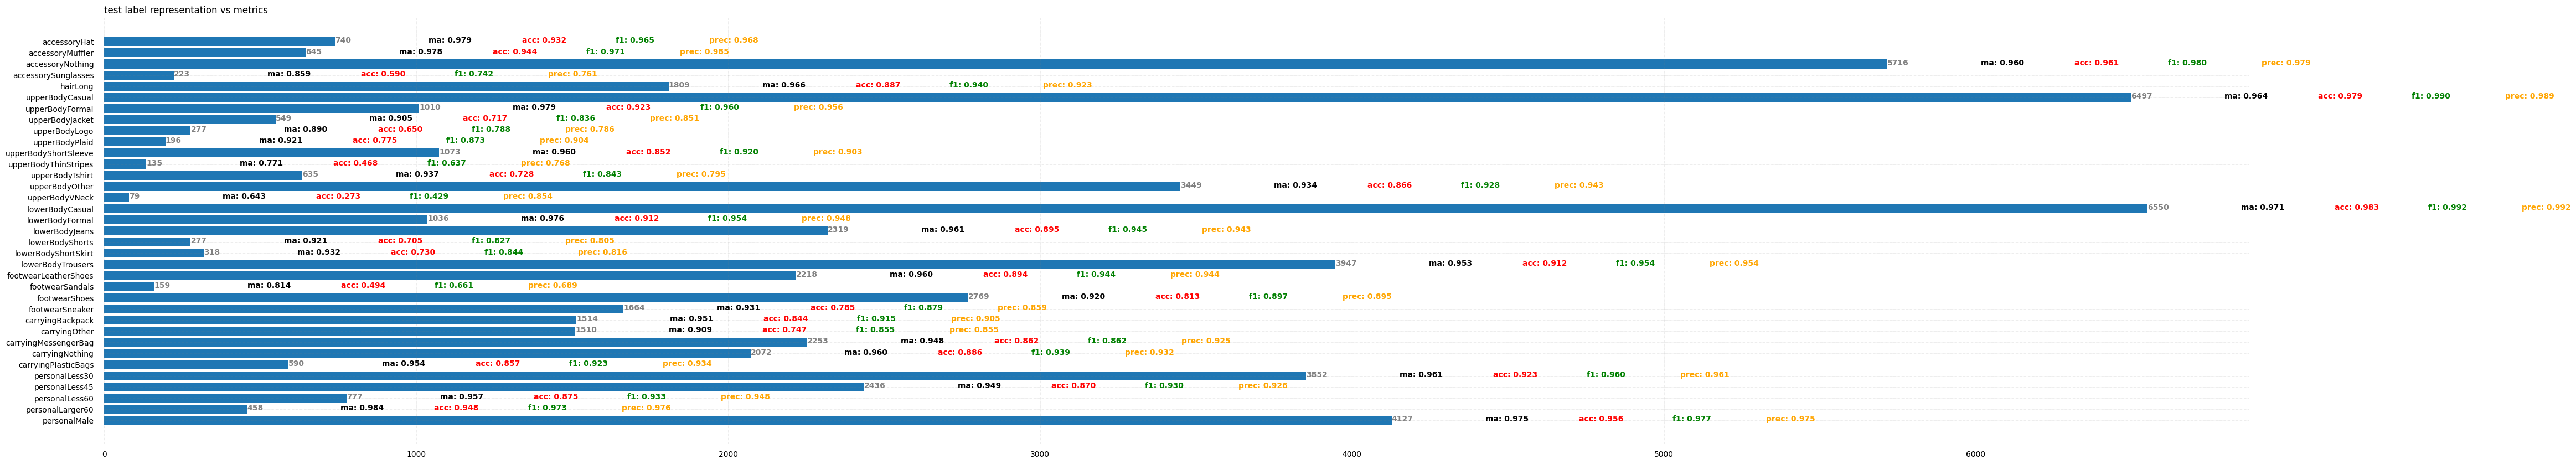

In [9]:
folderToSave="PETA/"
values = list(test_dt[attributes].sum())
attributes = attributes
namePlot = folderToSave+'testingperformance_vs_labelrepresentation.png'
legendName = 'test label representation vs metrics'
fig_size = (50, 10)
#plotBarRepresentation(fig_size, values, attributes, namePlot, legendName)
plotBarRepresentation(fig_size, values, attributes, namePlot, legendName, attributes_with_performance)